# Visualisasi dan Pengelompokan Customer Calon Penerima Pembiayaan

## Pendahuluan 

PT Home Credit Indonesia merupakan perusahaan pembiayaan yang memberikan layanan pembiayaan bagi pelanggan yang berbelanja secara online maupun offline. Kami juga menyediakan pembiayaan bagi pelanggan setia kami agar mereka dapat memenuhi kebutuhan finansial mereka.

### Permasalahan

## Business Recommendation

Berdasar Permasalahan tadi, saya pun mencoba mengambil keputusan bisnis yang bisa memprediksi calon customer yang tepat berdasar tipe penerima pembiayaan dari home credit sehingga memudahkan Home Credit untuk mendapatkan insight yang tepat terhadap calon customer penerima pembiayaan. 
Adapun tipe yang saya masukkan disini, calon customer yang mendapat pembiayaan adalah seseorang berusia diatas 30 tahun yang tidak mempunyai mobil, dan bertempat tinggal di daerah kategori A dengan rumah pribadi dan memiliki income dari x - y

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
#import Dataset
ds = pd.read_csv('marketing_campaign_data.csv')
ds.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT_W_CITY,APPL_DATETIME,DATE_BIRTH
0,58785,0,Cash loans,F,Y,Y,157500.0,225000.0,11781.0,225000.0,Secondary / secondary special,House / apartment,0.014520,2,2016-06-11 17:28:54,17-07-1959
1,166116,0,Cash loans,F,N,Y,180000.0,508495.5,21672.0,454500.0,Secondary / secondary special,House / apartment,0.031329,2,2015-05-22 08:42:03,23-06-1951
2,170111,0,Cash loans,F,Y,Y,360000.0,639396.0,47934.0,571500.0,Incomplete higher,House / apartment,0.032561,1,2016-11-26 20:54:07,07-06-1979
3,184247,0,Cash loans,F,N,Y,162000.0,254700.0,14751.0,225000.0,Higher education,House / apartment,0.010147,2,2017-02-20 09:22:06,20-07-1958
4,75886,0,Cash loans,M,Y,Y,225000.0,787131.0,42066.0,679500.0,Higher education,House / apartment,0.025164,2,2017-02-28 09:38:45,05-08-1985


## Data Description


In [4]:
des = pd.read_excel('marketing_campaign_data Description.xlsx')
des.drop('Unnamed: 0', axis=1, inplace=True)
des

,Row,Description
0,SK_ID_CURR,ID of loan in our sample
1,TARGET,Target variable (1 - client with payment diffi...
2,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving
3,CODE_GENDER,Gender of the client
4,FLAG_OWN_CAR,Flag if the client owns a car
5,FLAG_OWN_REALTY,Flag if client owns a house or flat
6,AMT_INCOME_TOTAL,Income of the client
7,AMT_CREDIT,Credit amount of the loan
8,AMT_ANNUITY,Loan annuity
9,AMT_GOODS_PRICE,For consumer loans it is the price of the good...


In [5]:
#info dataset
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30722 entries, 0 to 30721
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   30722 non-null  int64  
 1   TARGET                       30722 non-null  int64  
 2   NAME_CONTRACT_TYPE           30722 non-null  object 
 3   CODE_GENDER                  30722 non-null  object 
 4   FLAG_OWN_CAR                 30722 non-null  object 
 5   FLAG_OWN_REALTY              30722 non-null  object 
 6   AMT_INCOME_TOTAL             30722 non-null  float64
 7   AMT_CREDIT                   30722 non-null  float64
 8   AMT_ANNUITY                  30722 non-null  float64
 9   AMT_GOODS_PRICE              30722 non-null  float64
 10  NAME_EDUCATION_TYPE          30722 non-null  object 
 11  NAME_HOUSING_TYPE            30722 non-null  object 
 12  REGION_POPULATION_RELATIVE   30722 non-null  float64
 13  REGION_RATING_CL

In [6]:
#gecek duplikasi data
ds[ds.duplicated()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT_W_CITY,APPL_DATETIME,DATE_BIRTH


In [7]:
ds.isna().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_EDUCATION_TYPE            0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
REGION_RATING_CLIENT_W_CITY    0
APPL_DATETIME                  0
DATE_BIRTH                     0
dtype: int64

In [8]:
ds.shape

(30722, 16)

In [9]:
ds['TARGET'].value_counts()
ds['NAME_CONTRACT_TYPE'].value_counts()
ds['CODE_GENDER'].value_counts()
ds['FLAG_OWN_CAR'].value_counts()
ds['FLAG_OWN_REALTY'].value_counts()
ds['NAME_EDUCATION_TYPE'].value_counts()
ds['NAME_HOUSING_TYPE'].value_counts()
ds['REGION_RATING_CLIENT_W_CITY'].value_counts()
ds['AMT_INCOME_TOTAL'].value_counts()

135000.0    3432
112500.0    3209
157500.0    2706
180000.0    2467
90000.0     2215
            ... 
255150.0       1
131913.0       1
189715.5       1
634500.0       1
220131.0       1
Name: AMT_INCOME_TOTAL, Length: 579, dtype: int64

In [10]:
ds['DATE_BIRTH'] = pd.to_datetime(ds['DATE_BIRTH'], format = '%d-%m-%Y')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30722 entries, 0 to 30721
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   SK_ID_CURR                   30722 non-null  int64         
 1   TARGET                       30722 non-null  int64         
 2   NAME_CONTRACT_TYPE           30722 non-null  object        
 3   CODE_GENDER                  30722 non-null  object        
 4   FLAG_OWN_CAR                 30722 non-null  object        
 5   FLAG_OWN_REALTY              30722 non-null  object        
 6   AMT_INCOME_TOTAL             30722 non-null  float64       
 7   AMT_CREDIT                   30722 non-null  float64       
 8   AMT_ANNUITY                  30722 non-null  float64       
 9   AMT_GOODS_PRICE              30722 non-null  float64       
 10  NAME_EDUCATION_TYPE          30722 non-null  object        
 11  NAME_HOUSING_TYPE            30722 non-nu

In [11]:
#mengurutkan data dari tanggal lahir ter tua
print(ds.sort_values('DATE_BIRTH', inplace = True)) 
ds.head()
ds.tail()

None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT_W_CITY,APPL_DATETIME,DATE_BIRTH
19674,162776,0,Cash loans,M,Y,Y,450000.0,540000.0,56835.0,540000.0,Higher education,House / apartment,0.026392,2,2018-09-26 15:40:45,1997-09-24
29205,74619,0,Cash loans,M,Y,Y,157500.0,171000.0,11263.5,171000.0,Secondary / secondary special,House / apartment,0.018209,3,2018-12-21 12:15:25,1997-09-29
3737,136881,0,Cash loans,F,N,Y,112500.0,136287.0,6133.5,103500.0,Lower secondary,House / apartment,0.007120,2,2018-10-29 09:38:06,1997-10-05
8289,75634,1,Cash loans,F,N,N,67500.0,244584.0,16051.5,193500.0,Secondary / secondary special,With parents,0.002042,3,2018-12-25 22:28:04,1997-11-06
17077,66160,0,Cash loans,F,N,Y,81000.0,260568.0,28062.0,247500.0,Secondary / secondary special,House / apartment,0.028663,2,2018-11-18 07:17:13,1997-11-21


In [12]:
print(ds.sort_values('AMT_INCOME_TOTAL', inplace = True))
#pd.set_option('display.max_rows', 500) cara menampilkan semua data
#pd.set_option('display.max_columns', 500)
ds.head()
ds.tail()

None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT_W_CITY,APPL_DATETIME,DATE_BIRTH
16069,81185,0,Revolving loans,F,Y,N,2250000.0,2250000.0,112500.0,2250000.0,Higher education,House / apartment,0.072508,1,2016-01-27 02:00:49,1961-12-09
8529,145673,0,Revolving loans,M,Y,N,2250000.0,2250000.0,225000.0,2250000.0,Higher education,House / apartment,0.072508,1,2017-06-21 03:08:04,1968-03-09
23298,107926,0,Cash loans,M,Y,Y,2930026.5,900000.0,36657.0,900000.0,Secondary / secondary special,House / apartment,0.020713,2,2018-04-18 04:38:32,1953-10-31
10374,187833,0,Cash loans,M,N,N,4500000.0,835380.0,42651.0,675000.0,Secondary / secondary special,House / apartment,0.006008,2,2015-01-30 14:34:01,1951-05-06
20993,77768,0,Cash loans,F,Y,N,9000000.0,1431531.0,132601.5,1377000.0,Higher education,House / apartment,0.010147,2,2015-05-11 07:31:54,1955-07-22


In [13]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,30722.0,120718.282306,44253.455638,43602.000000,82412.500000,121038.00000,159091.000000,1.973380e+05
TARGET,30722.0,0.081049,0.272915,0.000000,0.000000,0.00000,0.000000,1.000000e+00
AMT_INCOME_TOTAL,30722.0,168584.909454,112049.952096,26100.000000,112500.000000,148500.00000,202500.000000,9.000000e+06
AMT_CREDIT,30722.0,600969.514078,404110.069794,45000.000000,270000.000000,513531.00000,808650.000000,3.375000e+06
AMT_ANNUITY,30722.0,27186.135685,14529.272514,1980.000000,16552.125000,24939.00000,34770.375000,2.250000e+05
AMT_GOODS_PRICE,30722.0,539786.550859,370712.508157,45000.000000,238500.000000,450000.00000,679500.000000,3.375000e+06
REGION_POPULATION_RELATIVE,30722.0,0.020865,0.013780,0.000533,0.010006,0.01885,0.028663,7.250800e-02
REGION_RATING_CLIENT_W_CITY,30722.0,2.035740,0.505262,1.000000,2.000000,2.00000,2.000000,3.000000e+00


In [14]:
ds.describe(include="object")

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,APPL_DATETIME
count,30722,30722,30722,30722,30722,30722,30722
unique,2,2,2,2,5,6,30720
top,Cash loans,F,N,Y,Secondary / secondary special,House / apartment,2015-01-27 15:08:19
freq,27810,20182,20385,21385,21882,27339,2


In [15]:
above_sixty = ds.query("DATE_BIRTH <= '1962-7-14'" ) #13145
fifty = ds.query("DATE_BIRTH >= '1962-7-13' and DATE_BIRTH <= '1972-7-14'" ) #5558
fourty = ds.query("DATE_BIRTH >= '1972-7-13' and DATE_BIRTH <= '1982-7-14'" ) #4065
thirty = ds.query("DATE_BIRTH >= '1982-7-13' and DATE_BIRTH <= '1992-7-14'" ) #5606
twenty = ds.query("DATE_BIRTH >= '1992-7-13' and DATE_BIRTH <= '2002-7-14'" ) #2360
Late_Ten = ds.query("DATE_BIRTH > '2002-7-14'" ) #0

In [16]:
#Menghapus data yang tidak diperlukan dan tidak terkait
ds.drop('FLAG_OWN_REALTY', axis=1, inplace=True)
ds.drop('AMT_CREDIT', axis=1, inplace=True)
ds.drop('APPL_DATETIME', axis=1, inplace=True)
ds.drop('REGION_POPULATION_RELATIVE', axis=1, inplace=True)
ds.drop('NAME_EDUCATION_TYPE', axis=1, inplace=True)
ds.drop('AMT_GOODS_PRICE', axis=1, inplace=True)
ds.drop('AMT_ANNUITY', axis=1, inplace=True)


In [17]:
ds.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,AMT_INCOME_TOTAL,NAME_HOUSING_TYPE,REGION_RATING_CLIENT_W_CITY,DATE_BIRTH
7177,186643,0,Cash loans,F,N,26100.0,House / apartment,2,1962-10-10
19648,121965,0,Cash loans,F,N,27000.0,House / apartment,2,1961-06-24
8060,195138,0,Cash loans,F,N,27000.0,House / apartment,2,1981-10-30
18679,85354,0,Cash loans,F,N,27000.0,House / apartment,2,1989-07-31
646,175599,0,Cash loans,F,N,27000.0,House / apartment,2,1956-04-17


## Exploratory Data Analysis

In [18]:
title_font = dict(size=20, weight="bold")

def plot_count(ds, y, title, **sns_kwargs):
    value_counts = ds[y].value_counts()
    percentage = value_counts / value_counts.sum()
    percentage = percentage.apply("{:.2%}".format)

    plt.figure(figsize=(14, 10))
    plt.title(title, fontdict=title_font)
    sns.countplot(data=ds, y=y, order=value_counts.index, **sns_kwargs)
    plt.ylabel("")
    plt.show()

    print(percentage)


def plot_distribution(ds, x, title, **sns_kwargs):
    plt.figure(figsize=(14, 10))
    plt.title(title, fontdict=title_font)
    sns.histplot(data=ds, x=x, kde=True, **sns_kwargs)
    plt.ylabel("")
    plt.show()


def plot_boxplot(ds, x, y, title, **sns_kwargs):
    plt.figure(figsize=(14, 10))
    plt.title(title, fontdict=title_font)
    sns.boxplot(data=ds, x=x, y=y, **sns_kwargs)
    plt.ylabel("")
    plt.show()

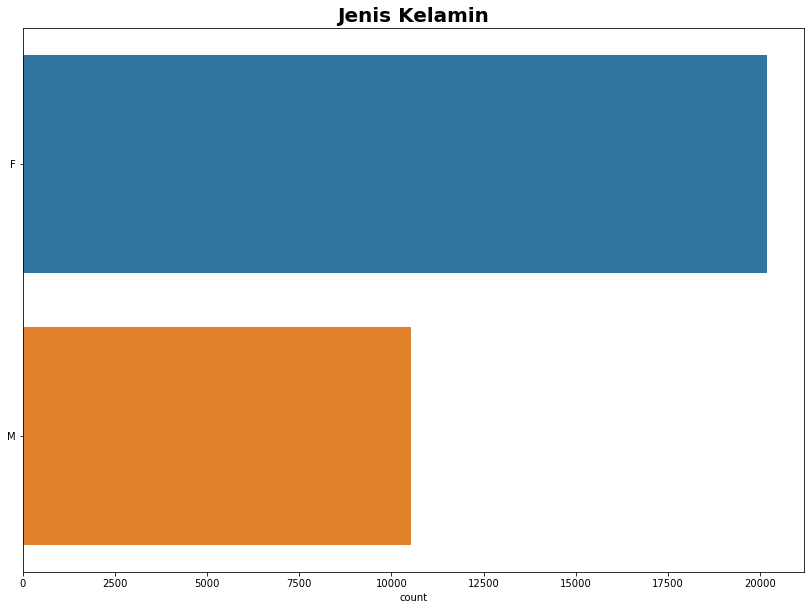

F    65.69%
M    34.31%
Name: CODE_GENDER, dtype: object


In [19]:
plot_count(ds, title="Jenis Kelamin",  y="CODE_GENDER")

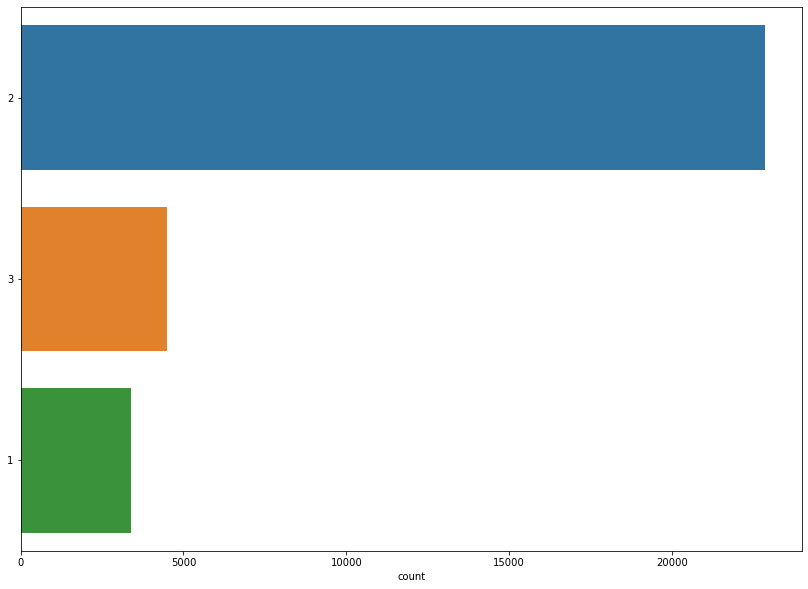

2    74.34%
3    14.61%
1    11.04%
Name: REGION_RATING_CLIENT_W_CITY, dtype: object


In [20]:
y = "REGION_RATING_CLIENT_W_CITY"
order = ds[y].sort_values().unique()
plot_count(ds, y=y, title="")

### Univariate Analysis : Histogram

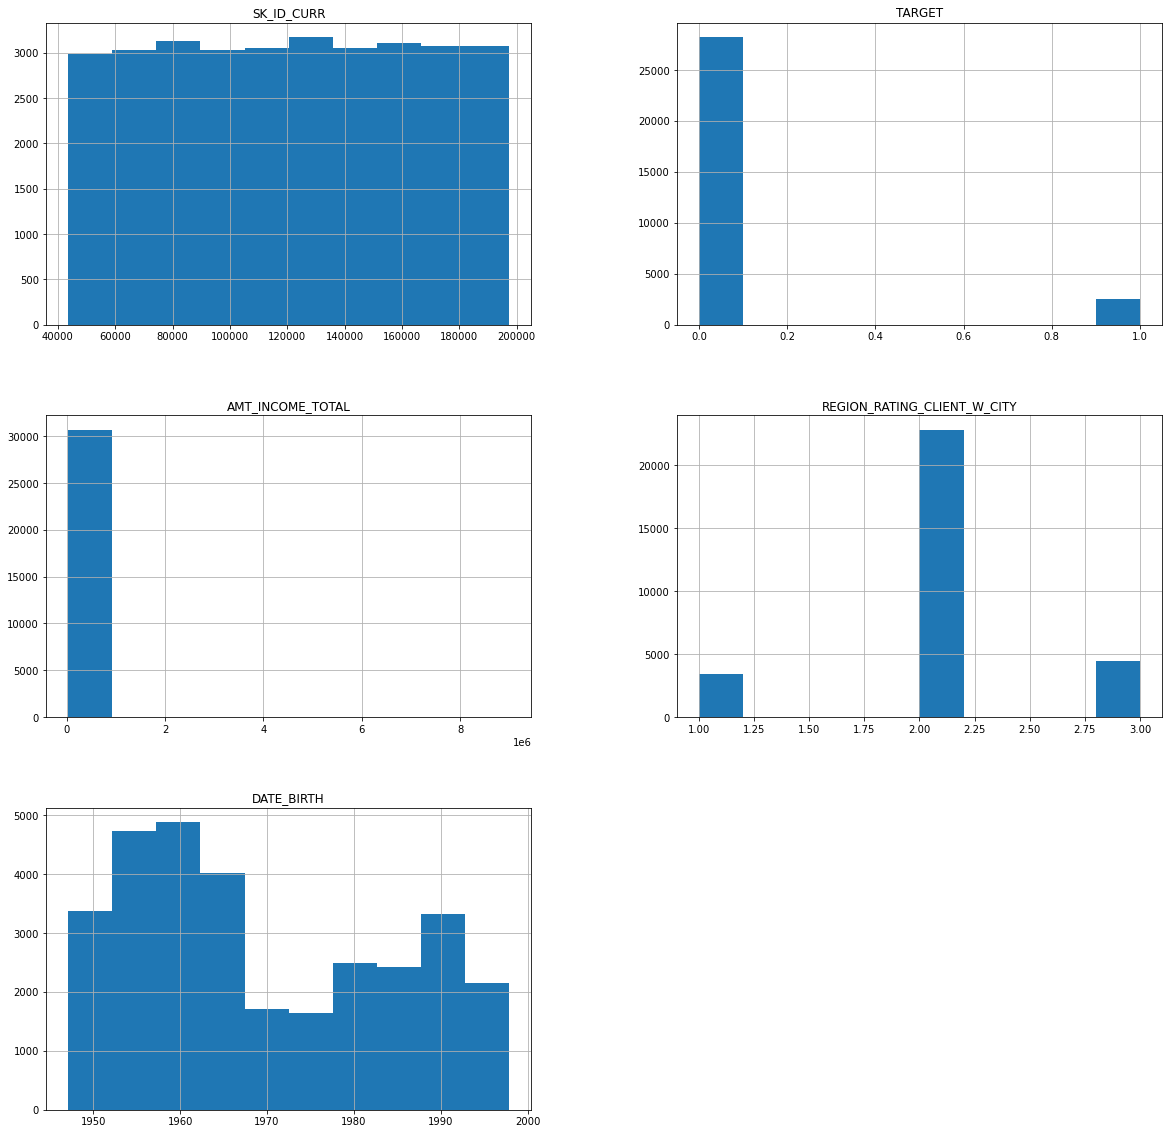

In [21]:
ds.hist(bins=10, figsize=(20,20));

In [22]:
#pisahkan data numerik dan kategorik
numeric = ds.select_dtypes(include=["int","float"]).columns
categoric = ds.select_dtypes("object").columns

print("columns numeric and float are {}".format(numeric.to_list()))
print("columns categorical are {}".format(categoric.to_list()))

columns numeric and float are ['AMT_INCOME_TOTAL']
columns categorical are ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'NAME_HOUSING_TYPE']


In [23]:
print("kolom numerik ada", len(numeric))
print("kolom kategorik ada", len(categoric))

kolom numerik ada 1
kolom kategorik ada 4


### Boxplot

<Figure size 1440x720 with 0 Axes>

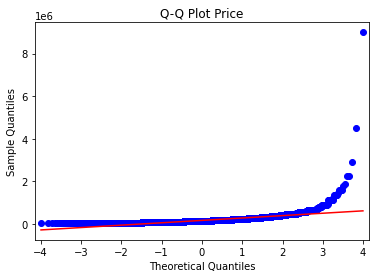

In [24]:
#uji normalitas pada total income customer
import statsmodels
import statsmodels.api as sm

plt.figure(figsize=(20,10))
sm.graphics.qqplot(ds["AMT_INCOME_TOTAL"],line="s")
plt.title("Q-Q Plot Price");

### One Hot Encoding 

In [55]:
# Select only categorical variables
ds_cat = ds


# One hot encode the variables
dummy_df = pd.get_dummies(ds_cat)


# Put the grade back in the dataframe
dummy_df['TARGET'] = ds['TARGET']

labels = ds['TARGET']
data = dummy_df
# Find correlations with grade
#dummy_df.corr()['G3'].sort_values()
data.shape
labels.shape
data
labels

7177     0
19648    0
8060     0
18679    0
646      0
        ..
16069    0
8529     0
23298    0
10374    0
20993    0
Name: TARGET, Length: 30722, dtype: int64

In [26]:
dummy_df.head()

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,TARGET
7177,1,0,1,0,1,0,0,1,0,0,0,0,0
19648,1,0,1,0,1,0,0,1,0,0,0,0,0
8060,1,0,1,0,1,0,0,1,0,0,0,0,0
18679,1,0,1,0,1,0,0,1,0,0,0,0,0
646,1,0,1,0,1,0,0,1,0,0,0,0,0


## Modelling

In [43]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy

In [57]:
X_train, X_test, y_train, y_test = train_test_split(dummy_df, labels , test_size = 0.2, random_state=0)

In [58]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse

In [59]:
# find the median
median_pred = X_train['TARGET'].median()

# create a list with all values as median
median_preds = [median_pred for _ in range(len(X_test))]

# store the true G3 values for passing into the function
true = X_test['TARGET']

In [60]:
# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 0.0817
Median Baseline RMSE: 0.2858


In [61]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    X_train = X_train.drop('TARGET', axis='columns')
    X_test = X_test.drop('TARGET', axis='columns')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=100)
    model4 = ExtraTreesRegressor(n_estimators=100)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=50)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [62]:
results = evaluate(X_train, X_test, y_train, y_test)
results

TypeError: The DTypes <class 'numpy.dtype[datetime64]'> and <class 'numpy.dtype[float64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.